# Machine Learning Project - Find the flag!

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

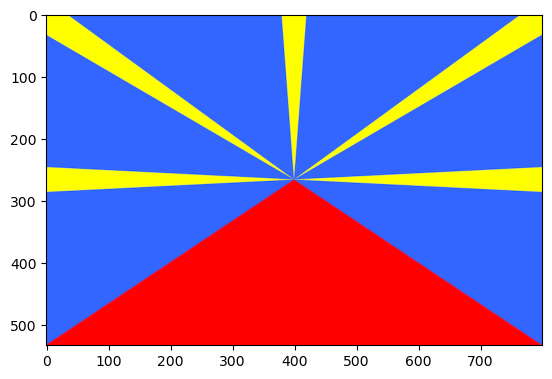

In [2]:
# Read Images
img = mpimg.imread('reunion.png')
 
# Output Images
plt.imshow(img)

### Can you guess which continent this flag comes from? What are some of the features that would clue you in? Maybe some of the colors are good indicators. The presence or absence of certain shapes could give you a hint. In this project, we’ll use decision trees to try to predict the continent of flags based on several of these features. We’ll explore which features are the best to use and the best way to create your decision tree.

Source: https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

In [3]:
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']


In [4]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)
df

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


In [5]:
#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 
       'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']



### Investigate the data

The dataset has been loaded for you in script.py and saved as a dataframe named df. Some of the input and output features of interest are:

    name: Name of the country concerned
    landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania
    bars: Number of vertical bars in the flag
    stripes: Number of horizontal stripes in the flag
    colours: Number of different colours in the flag
    red: 0 if red absent, 1 if red present in the flag
    etc...

We will build a decision tree classifier to predict what continent a particular flag comes from. Before that, we want to understand the distribution of flags by continent. 


In [6]:
#Print number of countries by landmass, or continent
df['landmass'].value_counts()


4    52
5    39
3    35
1    31
6    20
2    17
Name: landmass, dtype: int64

Rather than looking at all six continents, we will focus on just two, Europe and Oceania. Create a new dataframe with only flags from Europe and Oceania.

In [7]:
#Create a new dataframe with only flags from Europe and Oceania
df_36 = df[df["landmass"].isin([3,6])]
df_36

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
10,Australia,6,2,7690,15,1,1,0,0,3,...,1,1,6,0,0,0,0,0,white,blue
11,Austria,3,1,84,8,4,0,0,3,2,...,0,0,0,0,0,0,0,0,red,red
16,Belgium,3,1,31,10,6,0,3,0,3,...,0,0,0,0,0,0,0,0,black,red
26,Bulgaria,3,1,111,9,5,6,0,3,5,...,0,0,1,0,0,1,1,0,white,red
41,Cook-Islands,6,3,0,0,1,1,0,0,4,...,1,1,15,0,0,0,0,0,white,blue
44,Cyprus,3,1,9,1,6,1,0,0,3,...,0,0,0,0,0,1,1,0,white,white
45,Czechoslovakia,3,1,128,15,5,6,0,0,3,...,0,0,0,0,1,0,0,0,white,red


Given the list of predictors in the list var, print the average values of each for these two continents. Note which predictors have very different averages.

In [8]:
#Print the average values of the predictors for Europe and Oceania
df_36.groupby('landmass')[var].mean()

,red,green,blue,gold,white,black,orange,bars,stripes,circles,crosses,saltires,quarters,sunstars,triangle,animate
landmass,,,,,,,,,,,,,,,,
3,0.828571,0.2,0.514286,0.428571,0.771429,0.171429,0.057143,0.628571,1.285714,0.028571,0.285714,0.028571,0.028571,0.142857,0.028571,0.114286
6,0.800000,0.2,0.800000,0.600000,0.950000,0.150000,0.150000,0.000000,0.400000,0.150000,0.400000,0.300000,0.400000,3.300000,0.250000,0.300000


We will build a classifier to distinguish flags for these two continents – but first, inspect the variable types for each of the predictors.

In [9]:
#Create labels for only Europe and Oceania
labels = (df["landmass"].isin([3,6]))*1

In [10]:
#Print the variable types for the predictors
df_36[var].dtypes

red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object

Note that all the predictor variables are numeric except for mainhue. Transform the dataset of predictor variables to dummy variables and save this in a new dataframe called data.

In [11]:
#Create dummy variables for categorical predictors
data = pd.get_dummies(df['mainhue'])
data

,black,blue,brown,gold,green,orange,red,white
0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
189,0,0,0,0,0,0,1,0
190,0,0,0,0,0,0,1,0
191,0,0,0,0,1,0,0,0
192,0,0,0,0,1,0,0,0


Split the data into a train and test set.

In [12]:
#Split data into a train and test set
train_data, test_data, train_labels, test_labels = train_test_split(data,labels, random_state=1,test_size =.4)


## Tune Decision Tree Classifiers by Depth

We will explore tuning the decision tree model by testing the performance over a range of max_depth values. Fit a decision tree classifier for max_depth values from 1-20. Save the accuracy score in for each depth in the list acc_depth

In [13]:
#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth
depths = range(1, 21)
acc_depth = []
for i in depths:
    dt = DecisionTreeClassifier(random_state = 10, max_depth = i)
    dt.fit(train_data, train_labels)
    acc_depth.append(dt.score(test_data, test_labels))
    


Plot the accuracy of the decision tree models versus the max_depth.

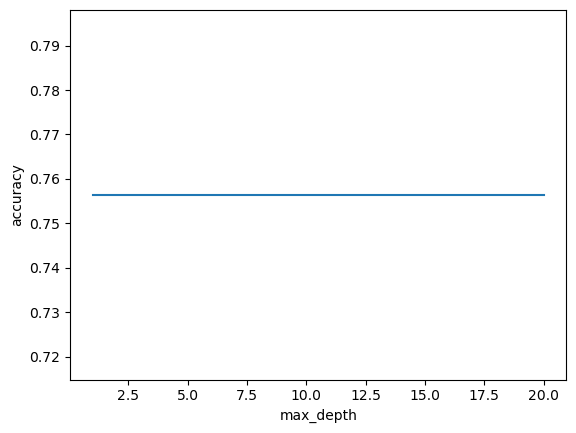

In [14]:
#Plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [15]:
#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy {round(max_acc,3)*100}% at depth {best_depth}')

Highest accuracy 75.6% at depth 1


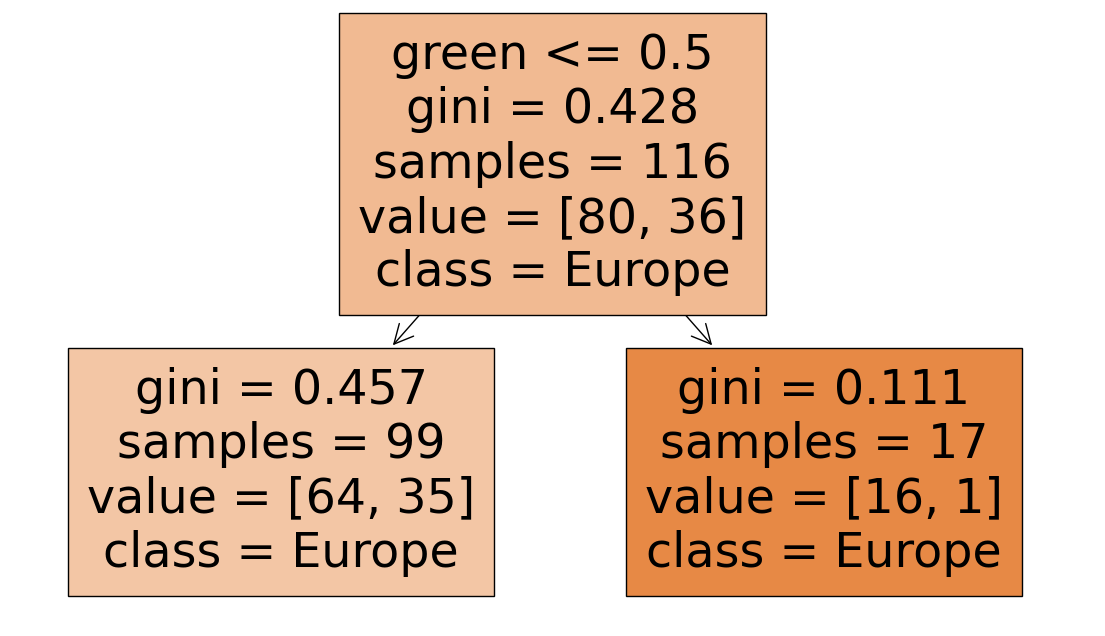

In [16]:
#Refit decision tree model with the highest accuracy and plot the decision tree
plt.figure(figsize=(14,8))
dt = DecisionTreeClassifier(random_state = 1, max_depth = best_depth)
dt.fit(train_data, train_labels)
tree.plot_tree(dt, feature_names = train_data.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)
plt.show()

## Tune Decision Tree Classifiers by Pruning

In [17]:
#Create a new list for the accuracy values of a pruned decision tree.  Loop through
#the values of ccp and append the scores to the list
acc_pruned = []
ccp = np.logspace(-3, 0, num=20)
for i in ccp:
    dt_prune = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=i)
    dt_prune.fit(train_data, train_labels)
    acc_pruned.append(dt_prune.score(test_data, test_labels))


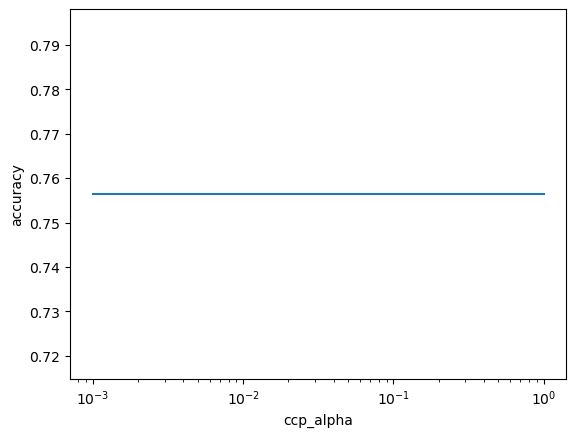

In [18]:
#Plot the accuracy vs ccp_alpha
plt.plot(ccp, acc_pruned)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.show()

In [19]:
#Find the largest accuracy and the ccp value this occurs
max_acc_pruned = np.max(acc_pruned)
best_ccp = ccp[np.argmax(acc_pruned)]
print(f'Highest accuracy {round(max_acc_pruned,3)*100}% at ccp_alpha {round(best_ccp,4)}')

Highest accuracy 75.6% at ccp_alpha 0.001


In [20]:
#Fit a decision tree model with the values for max_depth and ccp_alpha found above
dt_final = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=best_ccp)
dt_final.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=1, random_state=1)

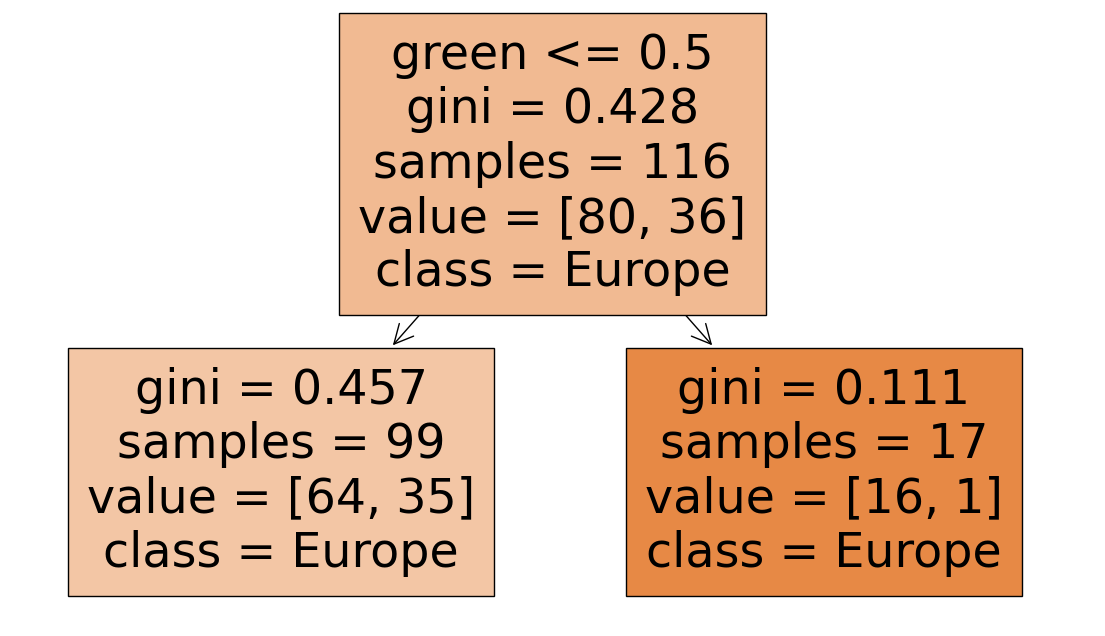

In [21]:
#Plot the final decision tree
plt.figure(figsize=(14,8))
tree.plot_tree(dt_final, feature_names = train_data.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)
plt.show()